In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Focus
Health workers, facilities, and coverage across the Tonga regions

# Datasets

- [Pacific Data's 2021 microdata for Health facilities](https://stats.pacificdata.org/vis?tm=palau&pg=0&fs[0]=Topic%2C0%7CHealth%23HEA%23&fc=Topic&hc[Pacific%20Island%20Countries%20and%20territories]=&snb=4&df[ds]=ds%3ASPC2&df[id]=DF_HEALTH_FACILITIES&df[ag]=SPC&df[vs]=1.0&dq=A.TO-5%2BTO-4%2BTO-3%2BTO-2%2BTO-1%2BTO._T..NFAC&pd=2021%2C2021&to[TIME_PERIOD]=false&ly[rw]=GEO_PICT&mdc[GEO_PICT]=TO&vw=md)
    - Used for understanding total health facilities and total healthcare workers per territory
- [Pacific Data's "Blue Pacific 2050: People-Centered Development (Thematic Area 2)](https://stats.pacificdata.org/vis?df[ds]=ds%3ASPC2&df[id]=DF_BP50_2&df[ag]=SPC&df[vs]=1.0&dq=A.SH_IHR_CAPS%2BBPI_MANASL2%2BBPI_MANAGL2%2BBPI_MANAL1%2BSH_MED_DEN%2BSPC_3_8_1.TO._T._T._T._T._T.._Z._T&lom=LASTNOBSERVATIONS&lo=11&pd=2010%2C2021&to[TIME_PERIOD]=false&ly[cl]=TIME_PERIOD&ly[rs]=OCCUPATION&ly[rw]=INDICATOR&vw=tb)
    - Used for filtering down to Tonga's healthcare worker density per 10,000 population
- World Health Organization "per 10,000" data for each healthcare worker type
    - [Medical Doctors](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/medical-doctors-(per-10-000-population))
    - [Pharmacists](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/pharmacists-(per-10-000-population))
    - [Nursing and Midwifery Personnel](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/nursing-and-midwifery-personnel-(per-10-000-population))
    - [Dentists](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/dentists-(per-10-000-population))

# Exploration

In [2]:
all_df = pd.read_csv("../data/bp2050_all.csv")
ppl_df = pd.read_csv("../data/bp2050_ppl_centered_dev.csv")

## Investigative notes

- There's a mapping which I can't fully find on the site but it's much easier to understand and navigate in tandem with the datahubs UI
- Columns like `DATAFLOW` and `FREQ` probably aren't relevant for this shorter analysis and challenge

### Noted Mappings:

`_T` indicates Total and `_Z` means "Not stated" (or the equivalent)

- `GEO_PICT`: are the individual Pacific Island Countries and Territories
    - 'FM': Micronesia
    - 'TV': Tuvalu
    - 'NR': Nauru
    - 'VU': Vanuatu
    - 'PW': Palau
    - 'TO': Tonga
    - 'MH': Mashall Islands
    - 'CK': Cook Islands
    - 'PG': Papua New Guinea
    - 'WS':
    - 'KI': Kiribati
    - 'SB':
    - 'FJ': Fiji
    - 'PF': French Polynesia
    - 'NU': Niue
    - 'NC': New caledonia
- `SEX`:
    - '_T': Total
    - 'F': Female
    - 'M': Male
- `AGE`: Provided as ranges (`Y` = start of range and `T` = end of range)
- `URBANIZATION`:
    - '_T': Total
    - 'U': Urban
    - 'R': Rural
- `INCOME`: Denotes quintiles, bottom 40\%, and top 60\%
- `EDUCATION`: Specific range based on entry
- `OCCUPATION`: Specific mapping based on entry
- `COMPOSITE_BREAKDOWN`: Special groups based on theme
- Occupation mappings
    - `221`: Medical Doctors
    - `2261`: Dentists
    - `222`: Nursing and Midwifery Professionals
    - `2221`: Nursing Professionals
    - `2262`: Pharmacists
    - `2222`: Midwifery Professionals

In [3]:
# target_df = pd.read_csv("../data/filtered_water_data_theme_2.csv")
target_inds = {
    "SH_MED_DEN": "Health worker density",
    "SPC_3_8_1": "Coverage of essential health services"
}
target_geo = [
    # "CK",
    # "NC",
    # "PF",
    # "WS",
    # "PW",
    # "FJ",
    "TO"
]

target_df = ppl_df[
    (ppl_df["INDICATOR"].isin(target_inds.keys())) & 
    (ppl_df["GEO_PICT"].isin(target_geo)) & 
    (ppl_df["URBANIZATION"] == '_T') &
    (ppl_df["TIME_PERIOD"] >= 2010) &
    (ppl_df["TIME_PERIOD"] <= 2021)
    ][
        [
            "INDICATOR",
            "COMPOSITE_BREAKDOWN",
            "GEO_PICT",
            "SEX",
            "AGE",
            "URBANIZATION",
            "INCOME",
            "OCCUPATION",
            "REPORTING_TYPE",
            "NATURE",
            "TIME_PERIOD",
            "OBS_VALUE",
            "UNIT_MEASURE"
        ]
    ]

In [4]:
target_df \
    .dropna(subset=["OBS_VALUE"]) \
    .sort_values(by=["GEO_PICT","TIME_PERIOD"]) \
    .head(10)

,INDICATOR,COMPOSITE_BREAKDOWN,GEO_PICT,SEX,AGE,URBANIZATION,INCOME,OCCUPATION,REPORTING_TYPE,NATURE,TIME_PERIOD,OBS_VALUE,UNIT_MEASURE
4709,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,2262,G,_X,2010,0.37,PER_10000_POP
5239,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,221,G,_X,2010,5.40,PER_10000_POP
8842,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,222,G,_X,2010,37.24,PER_10000_POP
9922,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,2261,G,_X,2010,0.93,PER_10000_POP
10354,SPC_3_8_1,_Z,TO,_T,_T,_T,_T,_T,G,_X,2010,52.79,INDEX
4710,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,2262,G,_X,2012,0.84,PER_10000_POP
4711,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,2262,G,_X,2013,0.37,PER_10000_POP
5240,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,221,G,_X,2013,5.14,PER_10000_POP
8843,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,222,G,_X,2013,38.10,PER_10000_POP
9923,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,2261,G,_X,2013,1.12,PER_10000_POP


In [5]:
measures = [
    "GEO_PICT",
    "SEX",
    "AGE",
    "URBANIZATION",
    "INCOME",
    "OCCUPATION",
    "UNIT_MEASURE",
    "REPORTING_TYPE",
    "NATURE",
    "TIME_PERIOD",
]
for ind, val in target_inds.items():
    print("*"*5,ind,": ",val,"*"*5)
    for measure in measures:
        print("\t",measure,": ",pd.unique(target_df[target_df["INDICATOR"]==ind][measure]))

***** SH_MED_DEN :  Health worker density *****
	 GEO_PICT :  ['TO']
	 SEX :  ['_T']
	 AGE :  ['_T']
	 URBANIZATION :  ['_T']
	 INCOME :  ['_T']
	 OCCUPATION :  ['2262' '221' '222' '2261']
	 UNIT_MEASURE :  ['PER_10000_POP']
	 REPORTING_TYPE :  ['G']
	 NATURE :  ['_X']
	 TIME_PERIOD :  [2010 2012 2013 2020 2021 2019 2018]
***** SPC_3_8_1 :  Coverage of essential health services *****
	 GEO_PICT :  ['TO']
	 SEX :  ['_T']
	 AGE :  ['_T']
	 URBANIZATION :  ['_T']
	 INCOME :  ['_T']
	 OCCUPATION :  ['_T']
	 UNIT_MEASURE :  ['INDEX']
	 REPORTING_TYPE :  ['G']
	 NATURE :  ['_X']
	 TIME_PERIOD :  [2010 2015 2017 2019 2021]


## WHO Data for baseline-comparison of Western Pacific Region

In [6]:
who_md_df = pd.read_excel("../data/WHO-western-pacific-medical-doctors.xlsx", skiprows=2)
who_nursing_df = pd.read_excel("../data/WHO-western-pacific-nursing-midwifery.xlsx", skiprows=2)
who_pharma_df = pd.read_excel("../data/WHO-western-pharmacists.xlsx", skiprows=2)
who_dentists_df = pd.read_excel("../data/WHO-western-pacific-dentists.xlsx", skiprows=2)

who_df = pd.concat([
    who_md_df, 
    who_nursing_df,
    who_pharma_df,
    who_dentists_df
])[["Indicator", "Period", "Value"]]

# Indicator-level Analyses

In [7]:
health_care_df_10000 = target_df[(target_df["INDICATOR"] == "SH_MED_DEN") & (target_df["UNIT_MEASURE"] == "PER_10000_POP")]
ess_hlth_df = target_df[(target_df["INDICATOR"] == "SPC_3_8_1") & (target_df["UNIT_MEASURE"] == "INDEX")]

In [8]:
health_care_df_10000

,INDICATOR,COMPOSITE_BREAKDOWN,GEO_PICT,SEX,AGE,URBANIZATION,INCOME,OCCUPATION,REPORTING_TYPE,NATURE,TIME_PERIOD,OBS_VALUE,UNIT_MEASURE
4709,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,2262,G,_X,2010,0.37,PER_10000_POP
4710,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,2262,G,_X,2012,0.84,PER_10000_POP
4711,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,2262,G,_X,2013,0.37,PER_10000_POP
4712,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,2262,G,_X,2020,0.76,PER_10000_POP
4713,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,2262,G,_X,2021,0.76,PER_10000_POP
5239,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,221,G,_X,2010,5.40,PER_10000_POP
5240,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,221,G,_X,2013,5.14,PER_10000_POP
5241,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,221,G,_X,2019,10.12,PER_10000_POP
5242,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,221,G,_X,2020,9.46,PER_10000_POP
5243,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,221,G,_X,2021,10.14,PER_10000_POP


# Healthcare Worker Density

In [9]:
health_care_df_10000.head(10)

,INDICATOR,COMPOSITE_BREAKDOWN,GEO_PICT,SEX,AGE,URBANIZATION,INCOME,OCCUPATION,REPORTING_TYPE,NATURE,TIME_PERIOD,OBS_VALUE,UNIT_MEASURE
4709,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,2262,G,_X,2010,0.37,PER_10000_POP
4710,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,2262,G,_X,2012,0.84,PER_10000_POP
4711,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,2262,G,_X,2013,0.37,PER_10000_POP
4712,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,2262,G,_X,2020,0.76,PER_10000_POP
4713,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,2262,G,_X,2021,0.76,PER_10000_POP
5239,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,221,G,_X,2010,5.40,PER_10000_POP
5240,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,221,G,_X,2013,5.14,PER_10000_POP
5241,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,221,G,_X,2019,10.12,PER_10000_POP
5242,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,221,G,_X,2020,9.46,PER_10000_POP
5243,SH_MED_DEN,_Z,TO,_T,_T,_T,_T,221,G,_X,2021,10.14,PER_10000_POP


In [10]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs, xticklabels=True, yticklabels=True)

def normalize(df, feature_name):
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    return (df[feature_name] - min_value) / (max_value - min_value)

occ_map = {
    "221": "Medical Doctors",
    "2261": "Dentists",
    "222": "Nursing and Midwifery Professionals",
    "2221": "Nursing and Midwifery Professionals",
    "2262": "Pharmacists",
    "2222": "Nursing and Midwifery Professionals"
}

In [11]:
data = health_care_df_10000[health_care_df_10000["TIME_PERIOD"] >= 2010][["GEO_PICT","OCCUPATION","TIME_PERIOD","OBS_VALUE"]]
data = data.replace({"OCCUPATION": occ_map})

geo = pd.unique(data["GEO_PICT"])
occ = pd.unique(data["OCCUPATION"])
year = pd.unique(data["TIME_PERIOD"])

mi = pd.MultiIndex.from_product([geo, occ, year])
grouped = data.groupby(["GEO_PICT", "OCCUPATION", "TIME_PERIOD"])["OBS_VALUE"].sum()
data = grouped \
    .reindex(mi, fill_value=pd.NA) \
    .to_frame() \
    .reset_index() \
    .rename(
        columns={
            "level_0": "GEO_PICT", 
            "level_1": "OCCUPATION", 
            "level_2": "TIME_PERIOD"
        }
    )

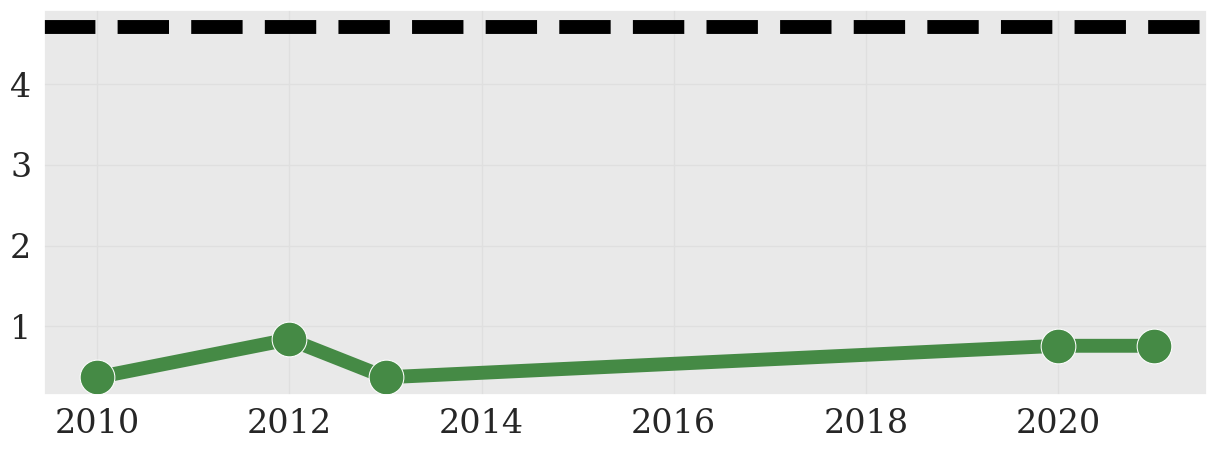

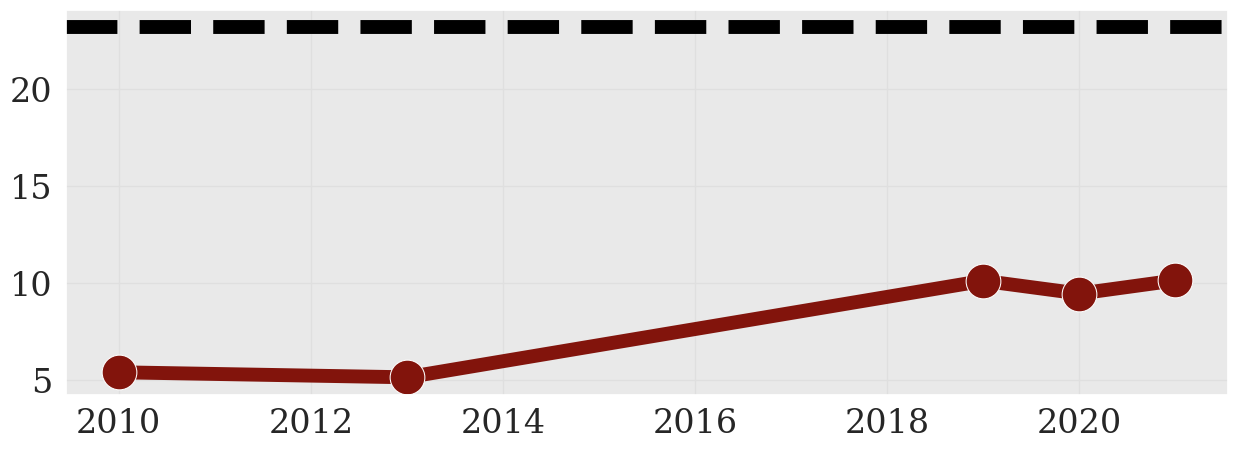

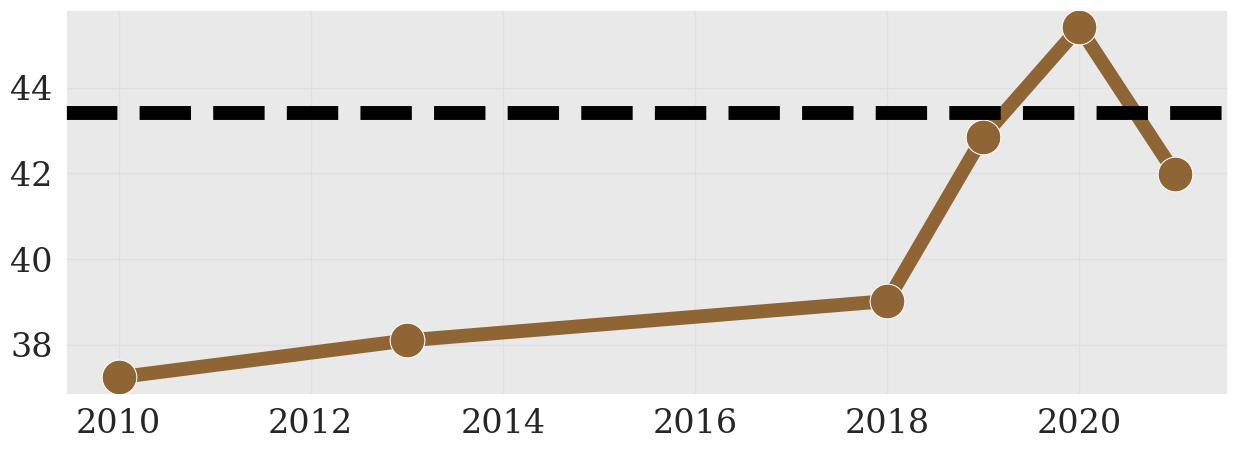

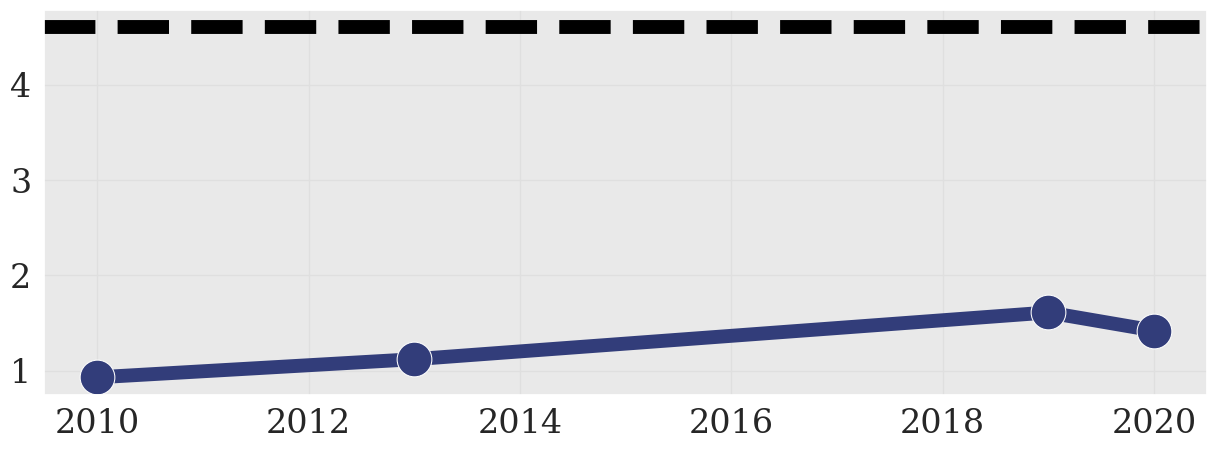

In [12]:
style_palette = {
    "Pharmacists": "#458a45",
    "Medical Doctors": "#82140c",
    "Nursing and Midwifery Professionals": "#8f6535",
    "Dentists": "#323d7a"
}
style_markers = {
    "Pharmacists": "d",
    "Medical Doctors": "o",
    "Nursing and Midwifery Professionals": "s",
    "Dentists": "h"
}

who_western_pa = {
    "Medical Doctors": 23.2,
    "Nursing and Midwifery Professionals": 43.4,
    "Pharmacists": 4.7,
    "Dentists": 4.6
}
who_style_palette = {
    "Pharmacists  (per 10,000)": "#458a45",
    "Medical doctors (per 10,000)": "#82140c",
    "Nursing and midwifery personnel (per 10,000)": "#8f6535",
    "Dentists (per 10,000)": "#323d7a"
}

width_pixels = 1500
height_pixels = 500

sns.set(
    font='serif',
    rc={
        'axes.labelsize': 24, 
        'xtick.labelsize': 24, 
        'ytick.labelsize': 24, 
        'legend.fontsize': 48,
        'axes.grid': True,
        'grid.color': '#DFDFDF',
        'axes.facecolor': '#E9E9E9',
        'savefig.transparent': True
    }
)

for key in style_markers.keys():
    plt.figure(figsize=(width_pixels/100, height_pixels/100))
    ax = sns.lineplot( 
        data=data[(data["GEO_PICT"] == "TO") & (data["OCCUPATION"] == key)],
        x="TIME_PERIOD", 
        y="OBS_VALUE",
        color=style_palette[key],
        marker="o",
        linewidth=10,
        markersize=25,
        legend=False
    )
    ax.set(
        xlabel="",
        ylabel=""
    )
    ax.axhline(y=who_western_pa[key], color="black", linestyle='--', linewidth=10)
    ax.get_figure().savefig(f"./charts/{key}_per_10000_WHO_comparison.svg")

## Total Healthcare workers per Island

In [13]:
micro_health_df = pd.read_csv("../data/tonga-health-facilities-data.csv")

In [14]:
per_terr_agg = micro_health_df[[
    "Pacific Island Countries and territories",
    "HEALTHSTAFF"
]].fillna(0).groupby("Pacific Island Countries and territories").sum()

per_terr_agg

,HEALTHSTAFF
Pacific Island Countries and territories,
'Eua,24.0
Ha'apai,12.0
Niuas,7.0
Tongatapu,505.0
Vava'u,59.0


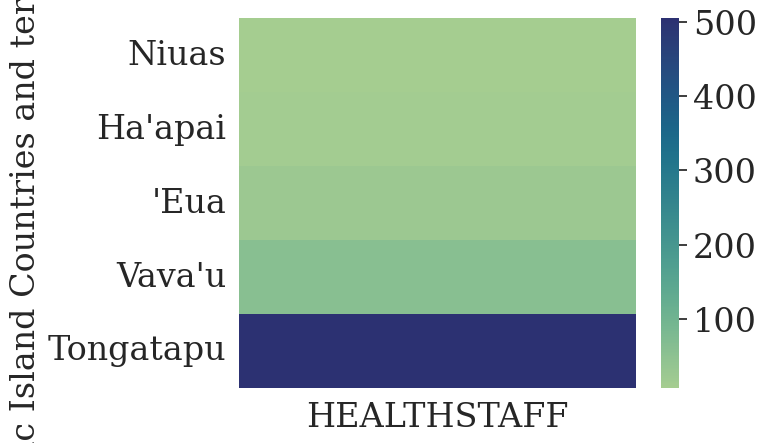

In [15]:
sns.heatmap(per_terr_agg.sort_values(by="HEALTHSTAFF"),cmap="crest").get_figure().savefig(f"./charts/total_per_region_heat.svg")

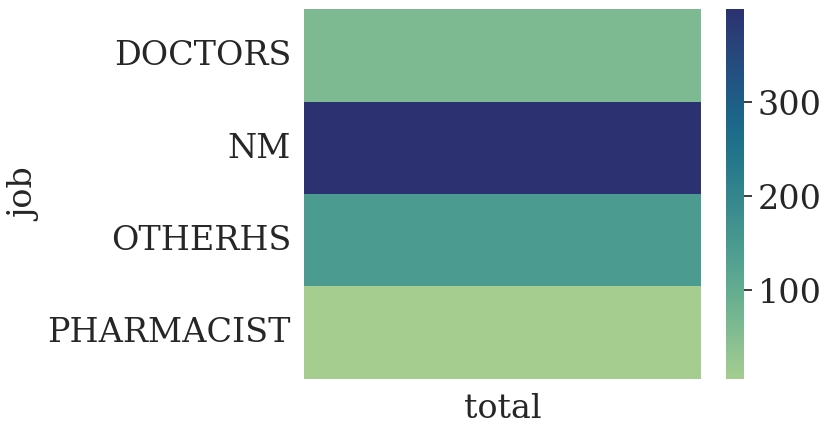

In [16]:
job_overall = pd.melt(
    micro_health_df[[
        "Pacific Island Countries and territories",
        "DOCTORS",
        "MIDW",
        "NURSES",
        "NURSEAIDS",
        "PHARMAOT",
        "PHARMACIST",
        "MICROSCOPIST",
        "OTHERHS"
    ]].fillna(0),
    value_vars=[
        "DOCTORS",
        "MIDW",
        "NURSES",
        "NURSEAIDS",
        "PHARMAOT",
        "PHARMACIST",
        "MICROSCOPIST",
        "OTHERHS"
    ],
    var_name="job",
    value_name="total"
)
job_overall["job"] = job_overall["job"].replace(
    {
        "MICROSCOPIST": "OTHERHS",
        "MIDW": "NM",
        "NURSES": "NM",
        "PHARMAOT": "OTHERHS",
        "NURSEAIDS": "OTHERHS"
    }
)
job_overall = job_overall.groupby(by=[
        "job"
    ]
).sum().sort_values(by=[
        "job"
    ]
)
sns.heatmap(job_overall,cmap="crest").get_figure().savefig(f"./charts/total_per_occ_heat.svg")

In [17]:
job_overall

,total
job,
DOCTORS,59.0
NM,399.0
OTHERHS,144.0
PHARMACIST,5.0


In [18]:
pd.melt(
    micro_health_df[[
        "Pacific Island Countries and territories",
        "DOCTORS",
        "MIDW",
        "NURSES",
        "NURSEAIDS",
        "PHARMAOT",
        "PHARMACIST",
        "MICROSCOPIST",
        "OTHERHS"
    ]].fillna(0),
    id_vars=["Pacific Island Countries and territories"],
    value_vars=[
        "DOCTORS",
        "MIDW",
        "NURSES",
        "NURSEAIDS",
        "PHARMAOT",
        "PHARMACIST",
        "MICROSCOPIST",
        "OTHERHS"
    ],
    var_name="job",
    value_name="total"
).groupby(by=[
        "Pacific Island Countries and territories",
        "job"
    ]
).sum().sort_values(by=[
        "Pacific Island Countries and territories",
        "job"
    ]
)

total
Pacific Island Countries and territories job                
'Eua                                     DOCTORS         2.0
                                         MICROSCOPIST    1.0
                                         MIDW            2.0
                                         NURSEAIDS       0.0
                                         NURSES         15.0
                                         OTHERHS         3.0
                                         PHARMACIST      0.0
                                         PHARMAOT        1.0
Ha'apai                                  DOCTORS         2.0
                                         MICROSCOPIST    0.0
                                         MIDW            0.0
                                         NURSEAIDS       0.0
                                         NURSES          8.0
                                         OTHERHS         2.0
                                         PHARMACIST      0.0
                                         PHARMAOT        0.0
Niuas                                    DOCTORS         0.0
                                         MICROSCOPIST    0.0
                                         MIDW            0.0
                                         NURSEAIDS       0.0
                                         NURSES          5.0
                                         OTHERHS         2.0
                                         PHARMACIST      0.0
                                         PHARMAOT        0.0
Tongatapu                                DOCTORS        49.0
                                         MICROSCOPIST    1.0
                                         MIDW           17.0
                                         NURSEAIDS       0.0
                                         NURSES        306.0
                                         OTHERHS       115.0
                                         PHARMACIST      5.0
                                         PHARMAOT       12.0
Vava'u                                   DOCTORS         6.0
                                         MICROSCOPIST    0.0
                                         MIDW            2.0
                                         NURSEAIDS       0.0
                                         NURSES         44.0
                                         OTHERHS         3.0
                                         PHARMACIST      0.0
                                         PHARMAOT        4.0